       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0        Kolkat

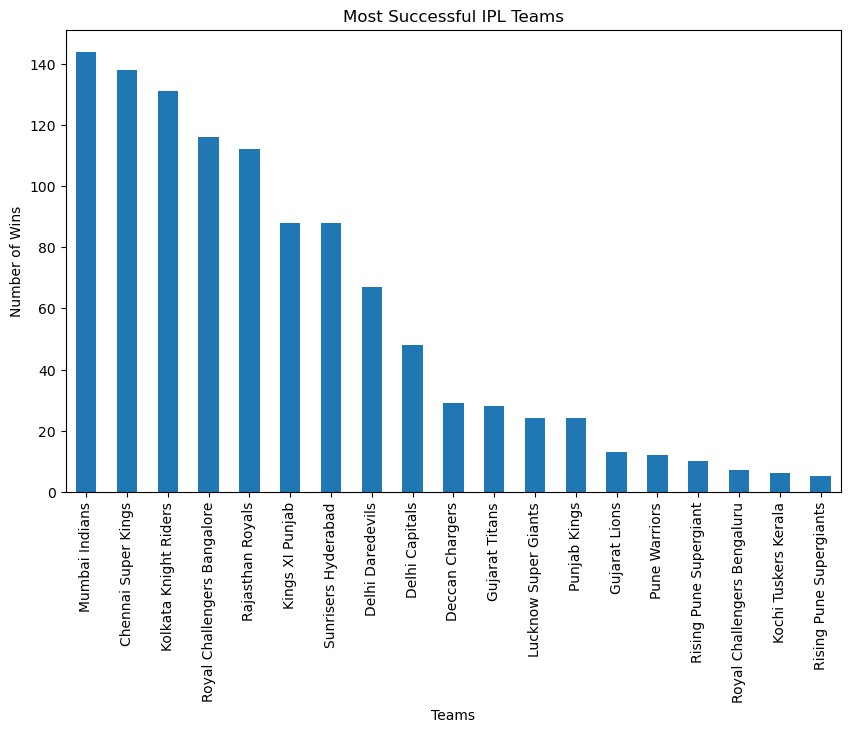

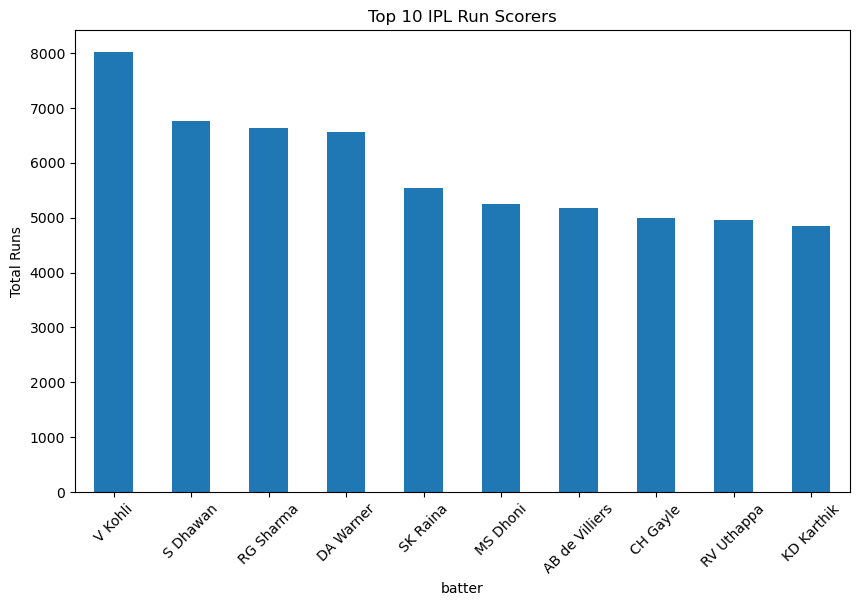

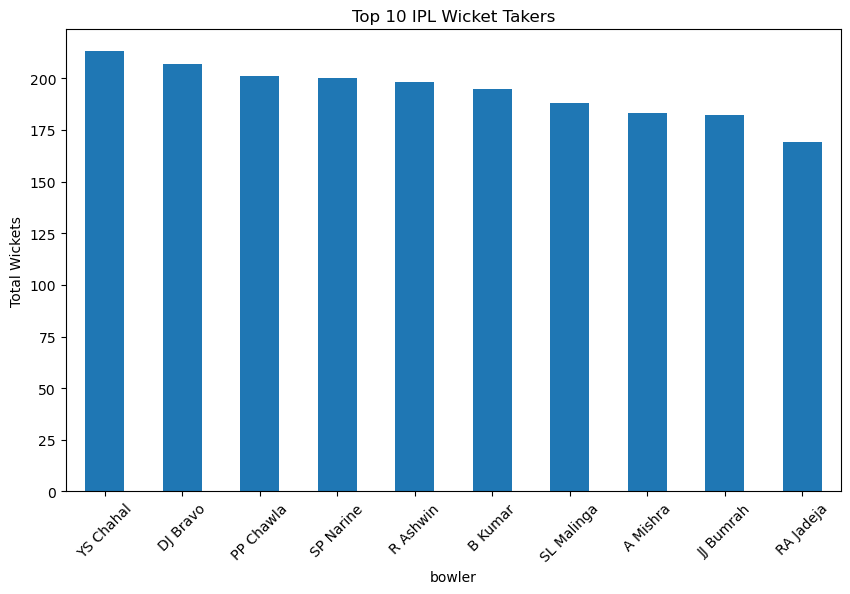

Model Accuracy: 48.62 %
Model Accuracy: 48.62 %


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
matches = pd.read_csv(r"C:\Users\DELL\Downloads\IPLProject\matches.csv")
deliveries = pd.read_csv(r"C:\Users\DELL\Downloads\IPLProject\deliveries.csv")

print(matches.head())
print(deliveries.head())
matches = matches.dropna(subset=['winner'])

print("Total Matches:", matches.shape[0])
plt.figure(figsize=(10,6))
matches['winner'].value_counts().plot(kind='bar')
plt.title("Most Successful IPL Teams")
plt.xlabel("Teams")
plt.ylabel("Number of Wins")
plt.xticks(rotation=90)
plt.show()
top_batsmen = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_batsmen.plot(kind='bar')
plt.title("Top 10 IPL Run Scorers")
plt.ylabel("Total Runs")
plt.xticks(rotation=45)
plt.show()
top_bowlers = deliveries[deliveries['dismissal_kind'].notnull()]
top_bowlers = top_bowlers.groupby('bowler')['dismissal_kind'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_bowlers.plot(kind='bar')
plt.title("Top 10 IPL Wicket Takers")
plt.ylabel("Total Wickets")
plt.xticks(rotation=45)
plt.show()
data = matches[['team1','team2','toss_winner','toss_decision','winner']]


data = data.dropna()


le = LabelEncoder()

for column in data.columns:
    data[column] = le.fit_transform(data[column])
X = data.drop('winner', axis=1)
y = data['winner']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)

print("Model Accuracy:", round(accuracy*100,2), "%")

matches = pd.read_csv(r"C:\Users\DELL\Downloads\IPLProject\matches.csv")
deliveries = pd.read_csv(r"C:\Users\DELL\Downloads\IPLProject\deliveries.csv")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

data = matches[['team1','team2','toss_winner','toss_decision','winner']]
data = data.dropna()

le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

X = data.drop('winner', axis=1)
y = data['winner']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)

print("Model Accuracy:", round(accuracy*100,2), "%")


